In [1]:
from IPython.core.display import HTML; HTML(open("styles/custom.css", "r").read())

# SymPy

SymPy is a symbolic mathematics library in pure Python. Unlike Mathematica, Maple, and other compter algebra systems, SymPy does not implement its own expression language. Because of this, it can seamlessly interoperate with other tools and libraries. In this section we learn to do the following:

* Import SymPy and set up pretty printing
* Use mathematical operations like `sqrt` and `sin`
* Make SymPy Symbols
* Take derivatives of expressions
* Simplify expressions

Just like NumPy and Pandas replace functions like `sin`, `cos`, `exp`, and `log` to powerful numeric implementations, SymPy replaces `sin`, `cos`, `exp` and `log` with powerful mathematical implementations.

In [2]:
from sympy import *  # common in interactive sympy
init_printing()  # Set up fancy printing

In [3]:
import math
math.sqrt(2)

In [4]:
sqrt(2)  # This `sqrt` comes from SymPy

In [5]:
cos(0)

### Exercise

Use the function `acos` on `-1` to find when cosine equals `-1`.  Try this same function with the math library.  Do you get the same result?

In [ ]:
# Call acos on -1 to find where on the circle the x coordinate equals -1



In [ ]:
# Call `math.acos` on -1 to find the same result using the builtin math module.  
# Is the result the same?  
# What does `numpy.arccos` give you?


## Symbols

Just like the NumPy `ndarray` or the Pandas `DataFrame`, SymPy has `Symbol`, which represents a mathematical variable.

We create symbols using the function `symbols`.  Operations on these symbols don't do numeric work like with NumPy or Pandas, instead they build up mathematical expressions.

In [6]:
x, y, z = symbols('x,y,z')
alpha, beta, gamma = symbols('alpha,beta,gamma')

In [7]:
x + 1

In [8]:
log(alpha**beta) + gamma

In [9]:
sin(x)**2 + cos(x)**2

### Exercise

Use `symbols` to create two variables, `mu` and `sigma`.  

In [ ]:
?, ? = symbols('?')

### Exercise

Use `exp`, `sqrt` and Python's arithmetic operators like `+, -, *, **` to create the standard bell curve with SymPy objects

$$ e^{\frac{(x - \mu)^2}{ \sigma^2}} $$

In [ ]:
exp(?)

## Functions

SymPy has a number of useful routines to manipulate expressions.  The most commonly used function is `simplify`.

In [10]:
expr = sin(x)**2 + cos(x)**2
expr

In [11]:
simplify(expr)

## Sympify

The `sympify` function transforms Python objects (ints, floats, strings) into SymPy objects (Integers, Reals, Symbols). 

*note the difference between `sympify` and `simplify`.  These are not the same functions.*

In [18]:
sympify('r * cos(theta)^2')

It's useful whenever you interact with the real world, or for quickly copy-paste an expression from an external source.

## Derivatives

One of the most commonly requested operations in SymPy is the derivative.  To take the derivative of an expression use the `diff` method

In [12]:
(x**2).diff(x)

In [13]:
sin(x).diff(x)

In [14]:
(x**2 + x*y + y**2).diff(x)

In [15]:
diff(x**2 + x*y + y**2, y) # diff is also available as a function

### Exercise

In the last section you made a normal distribution

In [ ]:
mu, sigma = symbols('mu,sigma')

In [ ]:
bell = exp((x - mu)**2 / sigma**2)
bell

Take the derivative of this expression with respect to $x$

In [ ]:
?.diff(?)

### Exercise

The second derivative of an expression is just the derivative of the derivative.  Chain `.diff()` calls to find the second and third derivatives of your expression.

In [ ]:
#  Find the second and third derivative of `bell`



## Integrals

As with symbolic differentiation and `diff()`,  SymPy also provides symbolic integration with `integrate()`.

Here is how we write the indefinite integral:

$$ \int x^2 dx = \frac{x^3}{3}$$

In [19]:
# Indefinite integral
integrate(x**2, x)

And the definite integral:

$$ \int_0^3 x^2 dx = \left.\frac{x^3}{3} \right|_0^3 = \frac{3^3}{3} - \frac{0^3}{3} = 9 $$

In [22]:
# Definite integral
integrate(x**2, (x, 0, 3))


And because everything is represented symbolically, we could use a symbol wherever we previously used a number:

$$ \int_y^z x^n dx $$

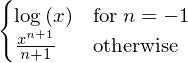

In [26]:
n = symbols('n', integer=True)  # restrict n
integrate(x**n, x)

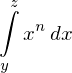

In [27]:
integrate(x**n, (x, y, z))

### Integration Exercise

Compute the following integrals:

$$ \int \sin(x) dx $$
$$ \int_0^{\pi} \sin(x) dx $$
$$ \int_0^y x^5 + 12x^3 - 2x + 1 dx $$
$$ \int e^{\frac{(x - \mu)^2}{\sigma^2}} dx $$

Feel free to experiment with altering various parameters in the above as well!

## Solveset

Equation solving is both a common need also a common building block for more 
complicated symbolic algorithms. The `solveset()` function is such a building block.

Solveset takes two arguments and one optional argument specifying the domain, an equation like $x^2 - 4$ and a variable on which we want to solve, like $x$ and an optional argument domain specifying the region in which we want to solve.

Solveset returns the values of the variable, $x$, for which the equation, $x^2 - 4$ equals 0.

In [28]:
solveset(x**2 - 4, x)

`solveset()` supports infinite solution (and a whole lot more).

In [29]:
solveset(sin(x), x)

### Exercise

Compute the radius of a sphere, given the volume.  Reminder, the volume of a sphere of radius `r` is given by

$$ V = \frac{4}{3}\pi r^3 $$

In [30]:
# Solve for the radius of a sphere, given the volume


## Numeric Evaluation

Of critical importance to most scientists, symbolic expressions can be used to drive numeric computations.